<a href="https://colab.research.google.com/github/eunewww/Transcribing_Kaggle/blob/main/Data_Preparation%26Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use Kaggle datasets in Colab
데이터셋 다운받을 때 참고하기

In [ ]:
# colab은 colab 파일당 content 경로가 새로 생성됨
# 그 content 경로 내에 자신의 구글드라이브를 마운트하여 연동할 수 있음.
# Kaggle_Colab 노트에서 Porto 데이터 셋을 다운받으니 그 노트파일 내에서만 확인 가능한 것으로 보임

# 드라이브에 api토큰 업로드하니 바로 데이터셋 다운로드 가능했음.
# 그러나 이 방식으로는 토큰이 노출되는 것 같으니, content폴더에 업로드후 드라이브내 숨김폴더에 복사해보겠음

In [5]:
pwd

'/content'

In [6]:
# /content/에 토큰 업로드
from google.colab import files
files.upload()

KeyboardInterrupt: ignored

In [7]:
# 내드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


숨김폴더'.kaggle' 만들 경로로 이동

* 리눅스 명령어 참고  
 기본적으로 ls 명령에는 숨겨진 파일이 표시되지 않습니다. Linux에서 숨겨진 파일은 점(.)으로 시작하는 모든 파일입니다.  
숨김 파일을 포함한 모든 파일을 표시하려면 -a 옵션을 사용합니다.

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Transcribing_Kaggle(20221218~)

In [ ]:
# 하위 경로에 숨김폴더를 만들어보겠음 안되서 코드 수정함
# !mkdir -p ~/.kaggle
!mkdir .kaggle

In [ ]:
!ls

In [ ]:
# 드디어만들어졌다ㅜㅜㅜㅜㅜ!
!ls -al

다시 content 경로로 돌아와 토큰을 숨김폴더에 카피

In [ ]:
cd /content/

In [ ]:
# "kaggle.json"인증키를 복사 특수문자는 ""로 묶어줌
!cp kaggle.json /content/drive/MyDrive/Colab" "Notebooks/Transcribing_Kaggle"(20221218~)"/.kaggle

In [ ]:
# .kaggle로 이동하여 확인
cd /content/drive/MyDrive/Colab Notebooks/Transcribing_Kaggle(20221218~)/.kaggle

In [ ]:
!ls -al

In [ ]:
# 꼭해야하는건지는 모르겠음. 소유자에만 읽기쓰기 권한을 주는 명령. Permission Warning 방지 
# giving rw access (if 401-nathorized)
!chmod 600 kaggle.json

Transcribing_Kaggle(20221218~)에 데이터셋 다운로드 시도하였으나 json 없다고 안됨.  
os.environ['KAGGLE_CONFIG_DIR']를 json있는 숨김폴더로 설정하고 다시 다운로드 진행하니 됨.

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Colab Notebooks/Transcribing_Kaggle(20221218~)/.kaggle" 

In [ ]:
cd /content/drive/MyDrive/Colab Notebooks/Transcribing_Kaggle(20221218~)/Safe_driver

In [ ]:
!kaggle competitions download -c porto-seguro-safe-driver-prediction

In [ ]:
!unzip porto-seguro-safe-driver-prediction.zip

댓글 참고  
As it turns out, there's a way to do that, which is set the environment variable KAGGLE_CONFIG_DIR  

If you don't have the json file yet, check the docs for how to get that: link
Then upload it to your drive. Mine happens to be at /content/drive/My Drive/fastai-v3/.kaggle/kaggle.json. (ayyy shoutout to the FastAI courses 👌 )
Now in colab you can just run:  

https://www.kaggle.com/general/51898 

# Data Preparation & Exploration

### 0. Laoding pachages

In [112]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer 
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

In [113]:
pwd

'/content'

In [114]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transcribing_Kaggle(20221218~)/Safe_driver/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transcribing_Kaggle(20221218~)/Safe_driver/test.csv')

### 1. Visual inspection of your data

Excerpt of the the data description for the competition:
* Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc).
* Feature names include the postfix bin to indicate binary features and cat to indicate categorical features.
* Features without these designations are either continuous or ordinal.
* Values of -1 indicate that the feature was missing from the observation.
* The target columns signifies whether or not a claim was filed for that policy holder.

In [115]:
train.head(3)

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0


In [116]:
train.shape

(595212, 59)

In [117]:
train.drop_duplicates()
train.shape

(595212, 59)

In [118]:
# We are missing one variable in the test set, but this is the target variable.
test.shape

(892816, 58)

In [119]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892816 entries, 0 to 892815
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              892816 non-null  int64  
 1   ps_ind_01       892816 non-null  int64  
 2   ps_ind_02_cat   892816 non-null  int64  
 3   ps_ind_03       892816 non-null  int64  
 4   ps_ind_04_cat   892816 non-null  int64  
 5   ps_ind_05_cat   892816 non-null  int64  
 6   ps_ind_06_bin   892816 non-null  int64  
 7   ps_ind_07_bin   892816 non-null  int64  
 8   ps_ind_08_bin   892816 non-null  int64  
 9   ps_ind_09_bin   892816 non-null  int64  
 10  ps_ind_10_bin   892816 non-null  int64  
 11  ps_ind_11_bin   892816 non-null  int64  
 12  ps_ind_12_bin   892816 non-null  int64  
 13  ps_ind_13_bin   892816 non-null  int64  
 14  ps_ind_14       892816 non-null  int64  
 15  ps_ind_15       892816 non-null  int64  
 16  ps_ind_16_bin   892816 non-null  int64  
 17  ps_ind_17_

Again, with the info() method we see that the data type is integer or float. No null values are present in the data set. That's normal because missing values are replaced by -1. We'll look into that later.





### 2. Defining the metadata
To facilitate the data management, we'll store meta-information about the variables in a DataFrame.  

* 메타 데이터란?  
https://namu.wiki/w/%EB%A9%94%ED%83%80%EB%8D%B0%EC%9D%B4%ED%84%B0

* role: input, ID, target  
level: nominal, interval, ordinal, binary  
keep: True or False  
dtype: int, float, str

 

In [120]:
data = []
for f in train.columns:
  # Defining the role
  if f == 'target': role = 'target'
  elif f == 'id': role ='id'
  else : role = 'input'
  
  # Deifining the level
  if 'bin' in f or f == 'target': level = 'binary'
  elif 'cat' in f or f =='id': level = 'nominal'
  elif train[f].dtype == float: level = 'interval'
  elif train[f].dtype == int: level = 'ordinal'

  # Initialixe keep to True for all variables except for id
  keep = True
  if f == 'id': keep = False

  # Defining data type
  dtype = train[f].dtype

  # Creating a Dict that contains all the metadata for the variable
  f_dict = {
      'varname' : f,
      'role' : role,
      'level' : level,
      'keep' : keep,
      'dtype' : dtype
  }
  data.append(f_dict)

In [121]:
data[0:2]

[{'varname': 'id',
  'role': 'id',
  'level': 'nominal',
  'keep': False,
  'dtype': dtype('int64')},
 {'varname': 'target',
  'role': 'target',
  'level': 'binary',
  'keep': True,
  'dtype': dtype('int64')}]

In [122]:
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])

In [123]:
meta.head(3)

,varname,role,level,keep,dtype
0,id,id,nominal,False,int64
1,target,target,binary,True,int64
2,ps_ind_01,input,ordinal,True,int64


In [124]:
meta.set_index('varname', inplace=True)

In [125]:
meta.head(3)

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64


In [126]:
# Example 
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

In [127]:
# meta.groupby(['role', 'level'])['role'].size()
# pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()})
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


### 3. Descriptive statistics
Thanks to our meta file we can easily select the variables on which we want to compute the descriptive statistics. To keep things clear, we'll do this per data level.

In [128]:
meta.head(3)

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64


Interval variables 

In [129]:
# """ train[f].dtype == float: level = 'interval' """
v = meta[(meta.level == 'interval') & (meta.keep)].index
train[v].describe()

#Missing values >> min -1

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


* reg variables  
 only ps_reg_03 has missing values.
 the range (min to max) differs between the variables. We could apply scaling (e.g. StandardScaler), but it depends on the classifier we will want to use.  

* car variables  
 ps_car_12 and ps_car_15 have missing values.  
 again, the range differs and we could apply scaling.  

* calc variables  
 no missing values.  
 this seems to be some kind of ratio as the maximum is 0.9  
 all three _calc variables have very similar distributions  


Ordinal variables

In [130]:
# """ train[f].dtype == int: level = 'ordinal' """
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
train[v].describe()

,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


* Only one missing variable: ps_car_11  
* We could apply scaling to deal with the different ranges

Binary variables

In [131]:
# """ 'bin' in f or f == 'target': level = 'binary' """
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* A priori in the train data is 3.645%, which is strongly imbalanced.  
* From the means we can conclude that for most variables the value is zero in most cases.

In [132]:
# target 0,1 이므로 합을 구하면 1의 개수 알 수 있음
# DataFrame의 열의 개수 >>len(df), df.shape[0], len(df.index)
train['target'].sum()/len(train)

0.036447517859182946

In [133]:
print(train['target'].sum())
print(len(train))
print(len(train)-train['target'].sum())
print(train['target'].sum()/len(train))


21694
595212
573518
0.036447517859182946


### 4. Handling imbalanced classes
As we mentioned above the proportion of records with target=1 is far less than target=0. This can lead to a model that has great accuracy but does have any added value in practice. Two possible strategies to deal with this problem are:
 >oversampling records with target=1  
 >undersampling records with target=0  
 
As we have a rather large training set, we can go for undersampling.


* randomstate  
https://rfriend.tistory.com/519  
* 불균형 데이터 문제  
https://velog.io/@cleansky/%EC%9D%B8%EC%82%AC%EC%9D%B4%EB%93%9C-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B6%88%EA%B7%A0%ED%98%95-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%83%98%ED%94%8C%EB%A7%81

In [134]:
desired_apriori=0.10

# Get the indices per target value
idx_0 = train[train.target == 0].index
idx_1 = train[train.target == 1].index

# Get original number of records per target value
nb_0 = len(train.loc[idx_0])
nb_1 = len(train.loc[idx_1])

# Calculate the undersampling rate and resulting number of records with target=0
# undersampling_rate 가 undersampled_nb_0/nb_0 같은데 왜 아래 수식을 썼을까?
undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori)
undersampled_nb_0 = int(undersampling_rate*nb_0)
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# Randomly select records with target=0 to get at the desired a priori
# random_state 는 재현가능(for reproducibility)하도록 난수의 초기값을 설정해주는 것이며, 아무 숫자나 넣어주면 됩니다. shuffle=True 가 디폴트 설정이므로 생략 가능합니다. 
# 기존의 0을 갖는 target 컬럼의 인덱스 중에서 undersampled_nb_0 개의 값을 랜덤으로 뽑겠다
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# Construct list with remaining indices
idx_list = list(undersampled_idx) + list(idx_1)

# Return undersample data frame
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


* Rate to undersample records with target=0: 0.34043569687437886
* Number of records with target=0 after undersampling: 195246

### 5. Data quality checks

Checking missing values

In [135]:
vars_with_missing = []

for f in train.columns:
    missings = train[train[f] == -1][f].count() #특정 컬럼의 -1을 갖는 행의 개수
    if missings > 0:
        vars_with_missing.append(f)
        missings_perc = missings/train.shape[0] # 특정 컬럼에서 missing 행의 개수
        
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [136]:
# Dropping the variables with too many missing values
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat']
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False  # Updating the meta

In [137]:
# imputer 대신 SimpleImputer(missing_values=np.nan, strategy='mean')
# SimpleImputer parameter에 axis 없음. 제거하고 돌리겠음 
mean_imp = SimpleImputer(missing_values=-1, strategy='mean') #, axis=0
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent') #, axis=0
train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

Checking the cardinality of the categorical variables

In [138]:
train['ps_ind_02_cat'].value_counts()

 1    157124
 2     45273
 3     10310
 4      4130
-1       103
Name: ps_ind_02_cat, dtype: int64

In [139]:
# """ 'cat' in f or f =='id': level = 'nominal' """ 이었고, id만 keep=False
v = meta[(meta.level == 'nominal') & (meta.keep)].index #cat 컬럼만 모으기

for f in v:
    dist_values = train[f].value_counts().shape[0] #value_counts를 통해 고유값 개수 카운트
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


음 어렵네^^^

In [140]:
# Script by https://www.kaggle.com/ogrellier
# Code: https://www.kaggle.com/ogrellier/python-target-encoding-for-categorical-features
def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [141]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)

meta.loc['ps_car_11_cat','keep'] = False  # Updating the meta

test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

### 6. Exploratory data visualization
Categorical variables  
Interval variables

In [142]:
train[['ps_ind_02_cat', 'target']].groupby(['ps_ind_02_cat'],as_index=False).mean()

,ps_ind_02_cat,target
0,-1,0.388350
1,1,0.098190
2,2,0.104102
3,3,0.101746
4,4,0.112349


<Figure size 432x288 with 0 Axes>

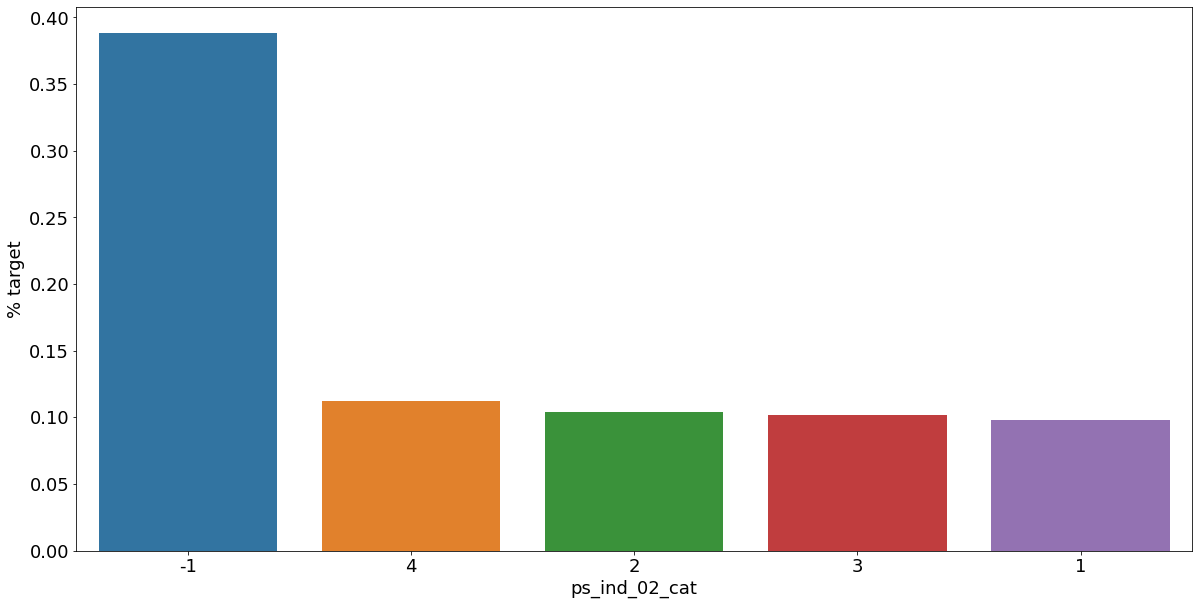

<Figure size 432x288 with 0 Axes>

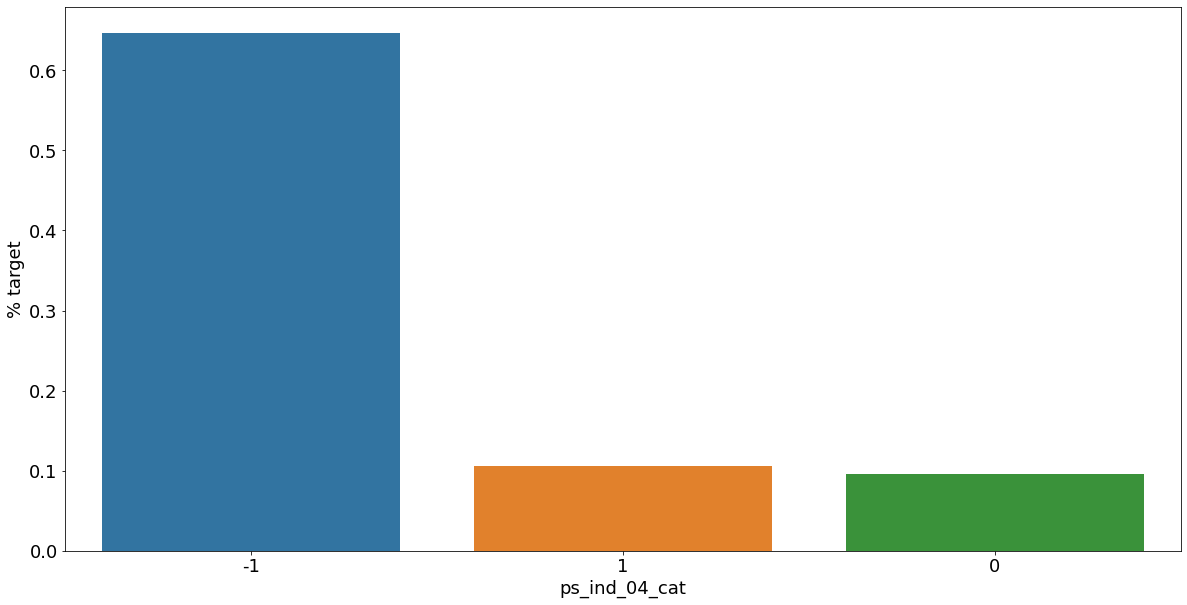

<Figure size 432x288 with 0 Axes>

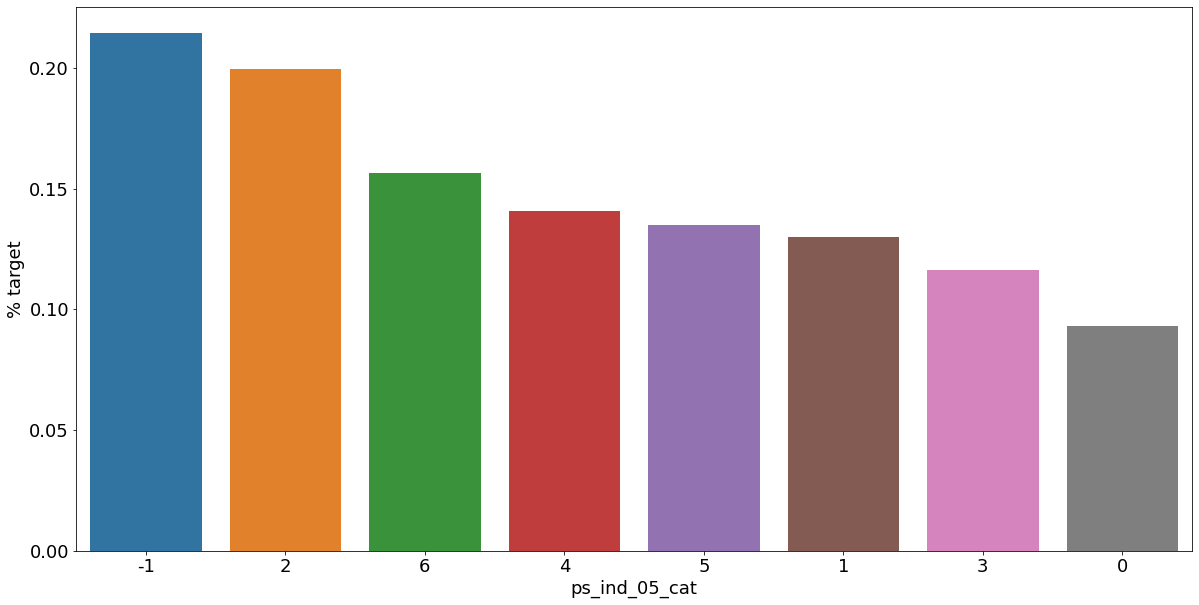

<Figure size 432x288 with 0 Axes>

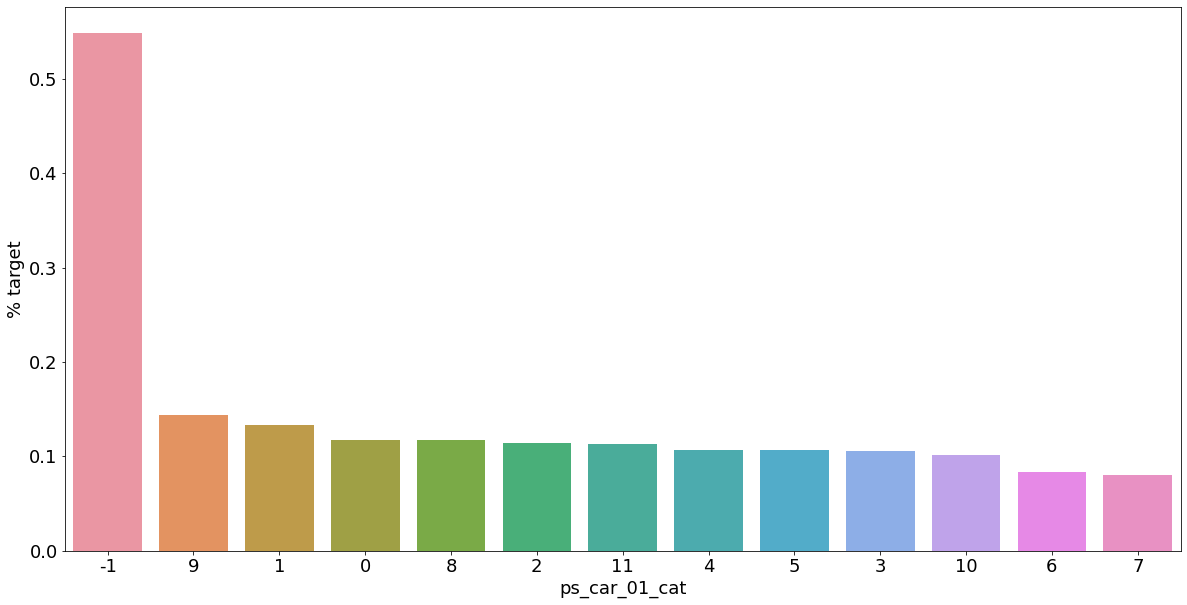

<Figure size 432x288 with 0 Axes>

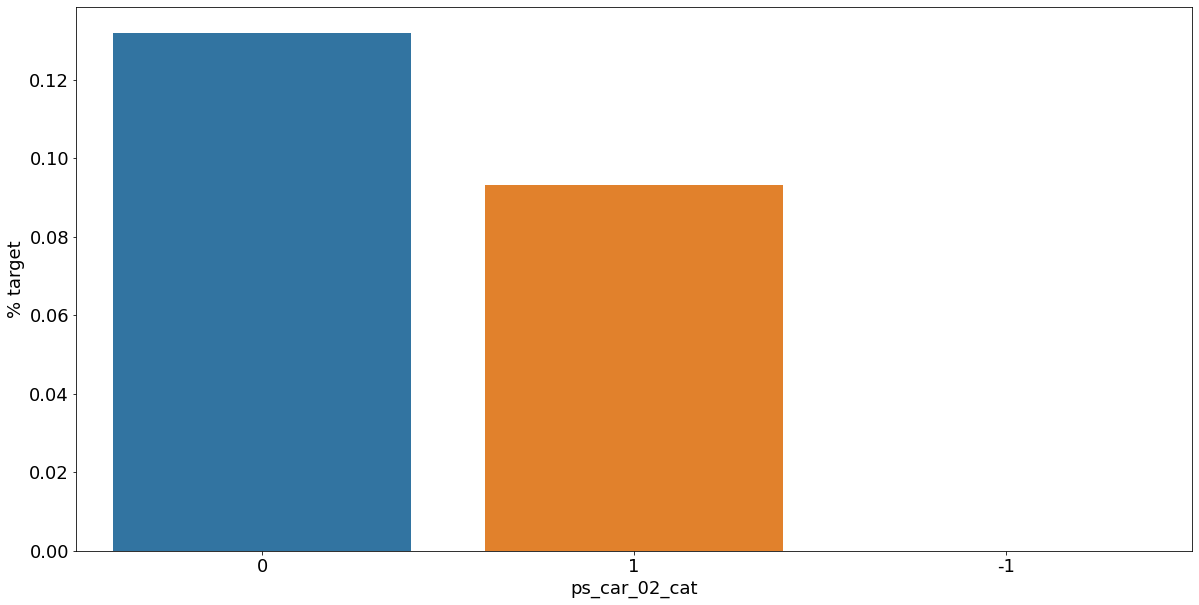

<Figure size 432x288 with 0 Axes>

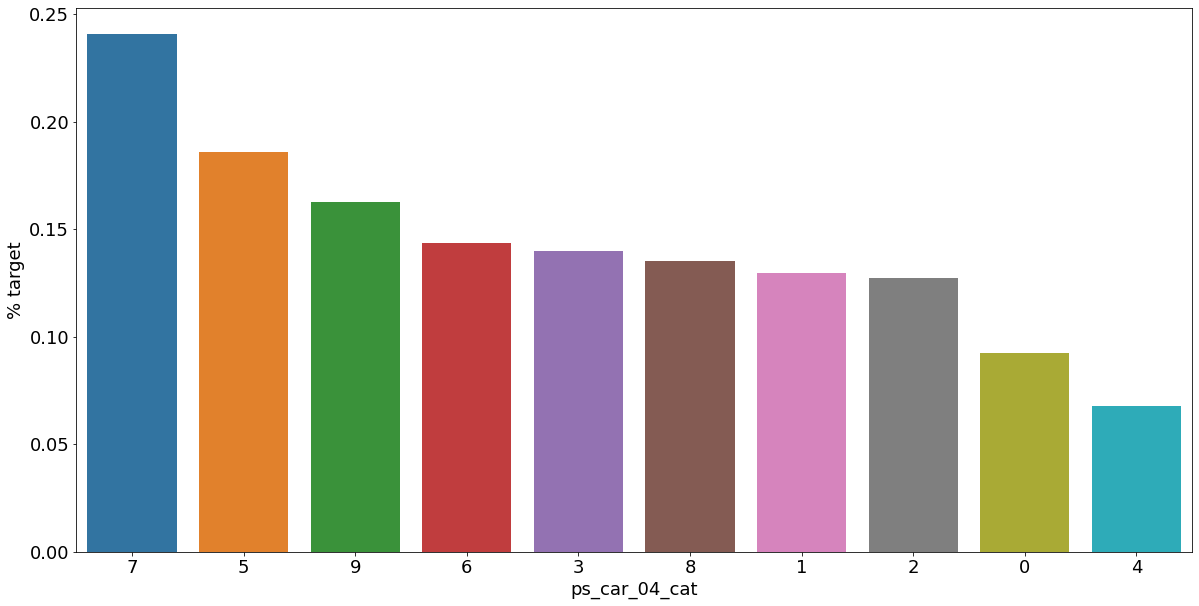

<Figure size 432x288 with 0 Axes>

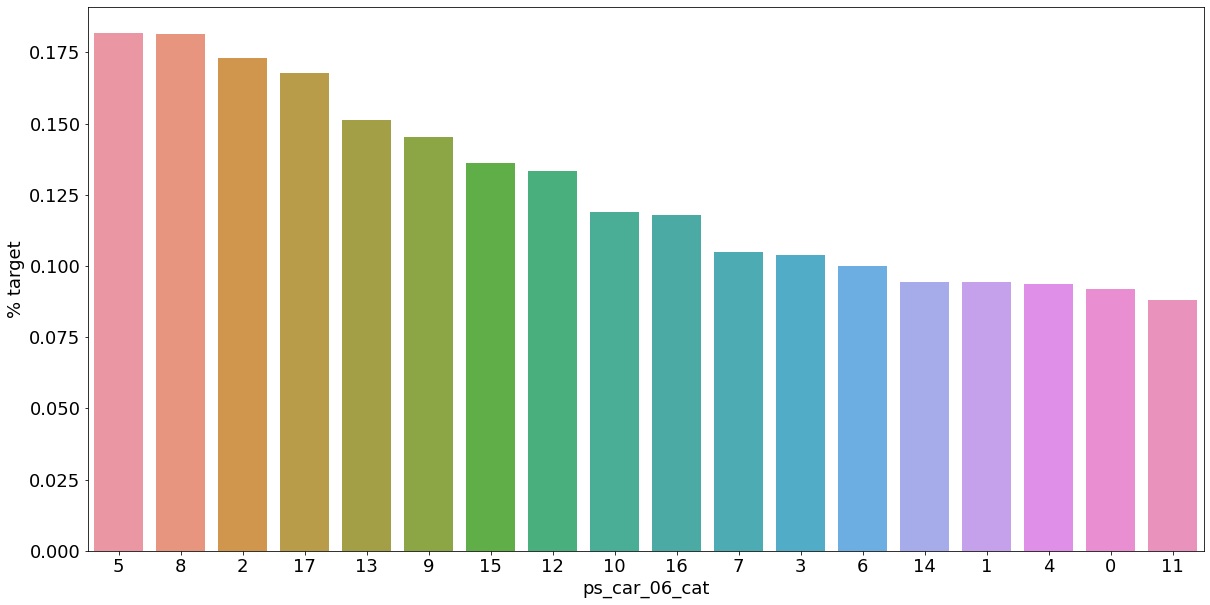

<Figure size 432x288 with 0 Axes>

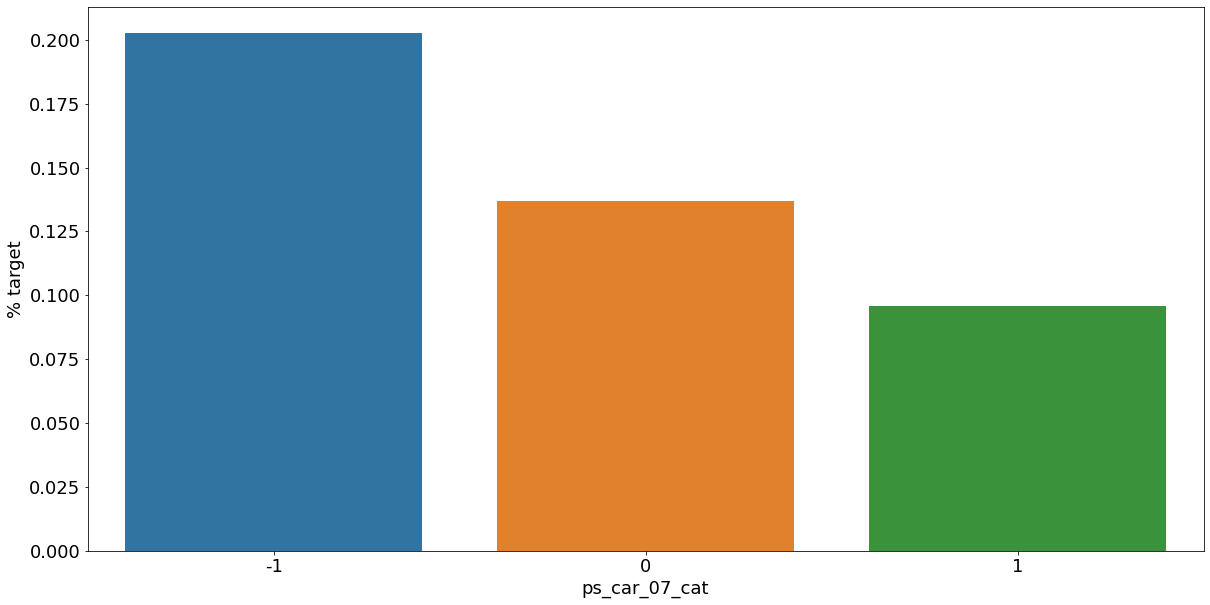

<Figure size 432x288 with 0 Axes>

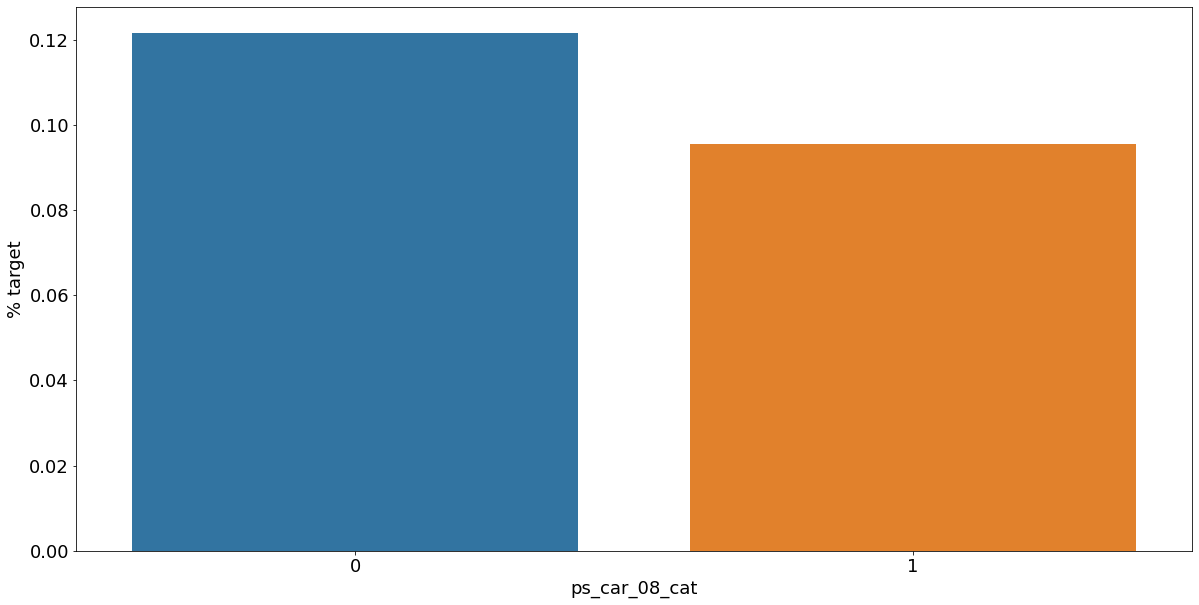

<Figure size 432x288 with 0 Axes>

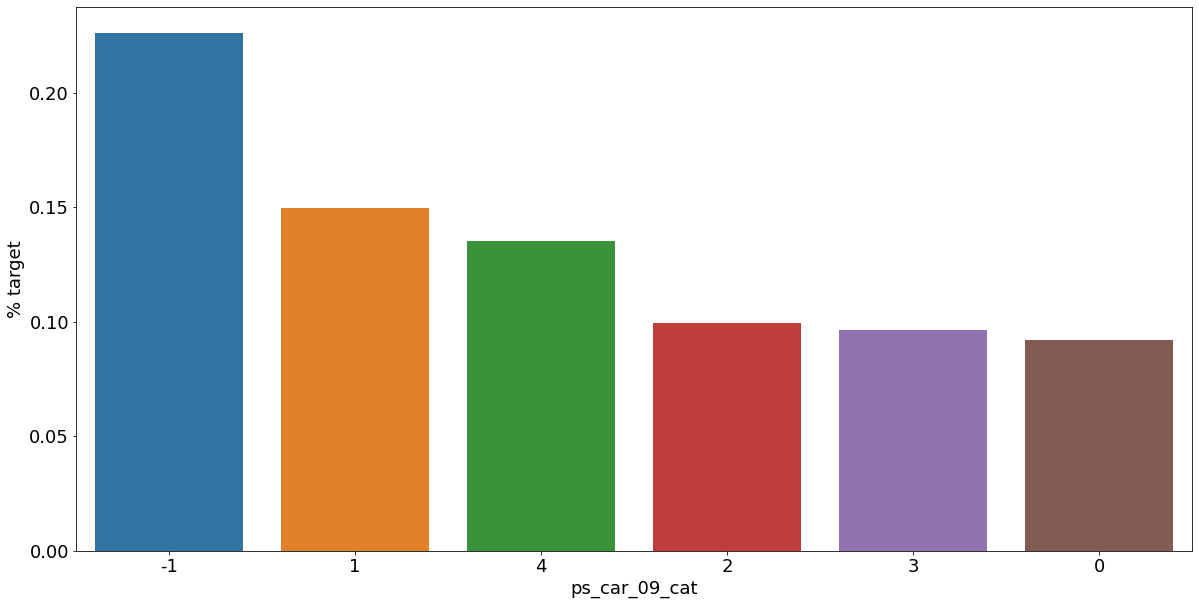

<Figure size 432x288 with 0 Axes>

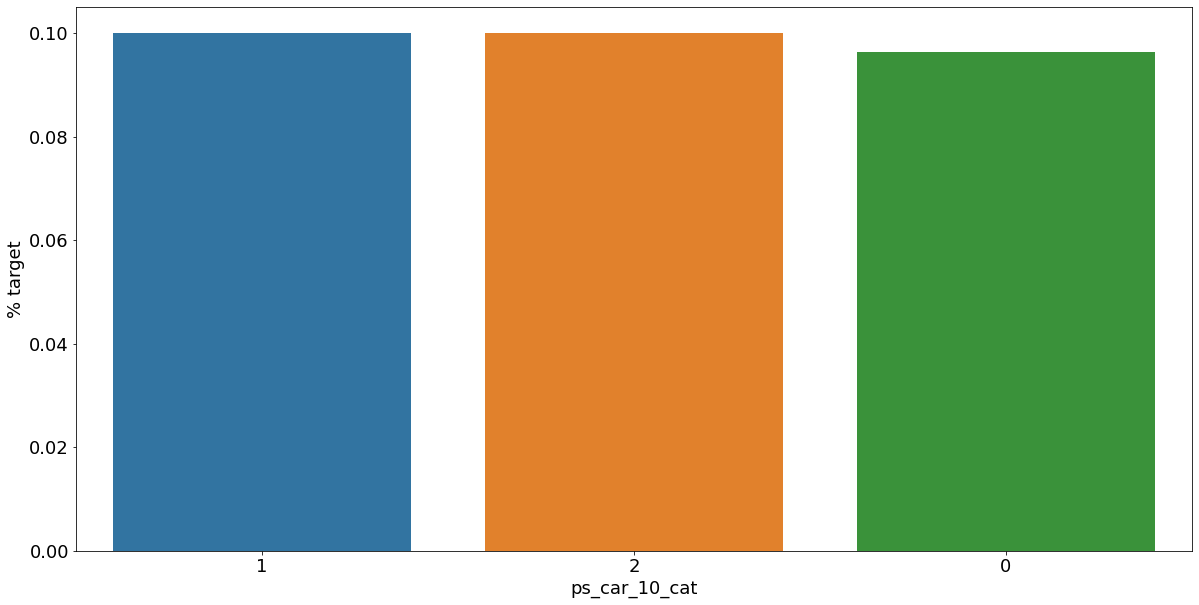

In [143]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index #categorical value

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))
    # Calculate the percentage of target=1 per category value
    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean() # f컬럼의 고유값에 대해 target컬럼으로 평균값 구함 >> 값이 1에 가까울수록 target. 특정 값이 개수가 작을수도, 아니면 0값만 갖을수도
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

* As we can see from the variables with missing values, it is a good idea to keep the missing values as a separate category value, instead of replacing them by the mode for instance. The customers with a missing value appear to have a much higher (in some cases much lower) probability to ask for an insurance claim.

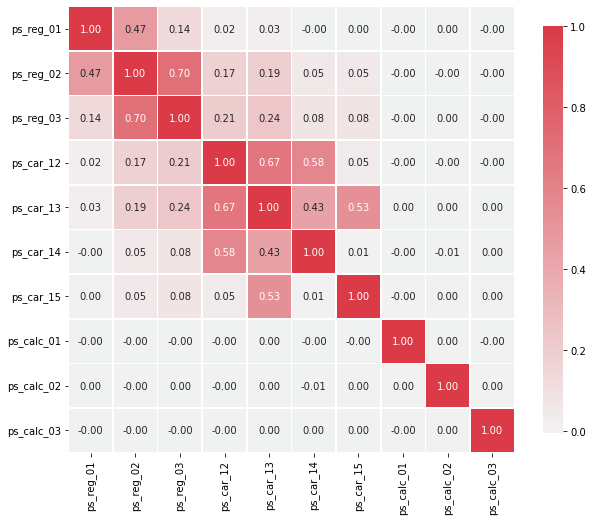

In [144]:
def corr_heatmap(v):
    correlations = train[v].corr()

    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

* ps_reg_02 and ps_reg_03 (0.7)  
ps_car_12 and ps_car13 (0.67)  
ps_car_12 and ps_car14 (0.58)  
ps_car_13 and ps_car15 (0.67)  

In [145]:
# take a sample of the train data to speed up the process
s = train.sample(frac=0.1)

> ps_reg_02 and ps_reg_03




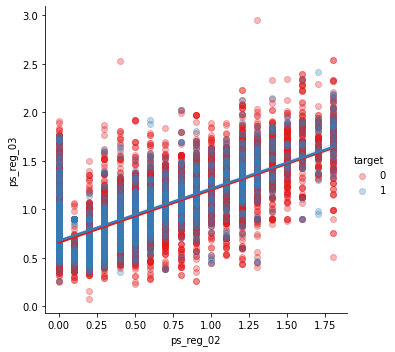

In [146]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

> ps_car_12 and ps_car_13 >> 원본과 상이함  
SimpleImputer(ps_reg_03, ps_car_12, ps_car_14, ps_car_11) 때문인가??

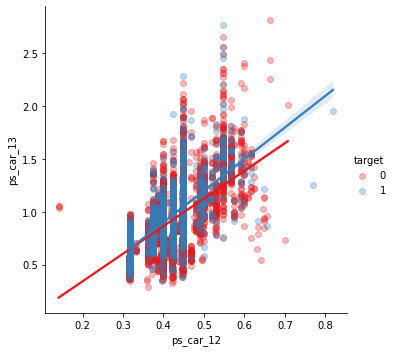

In [147]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

> ps_car_12 and ps_car_14 >> 원본과 상이함  
SimpleImputer(ps_reg_03, ps_car_12, ps_car_14, ps_car_11) 때문인가??

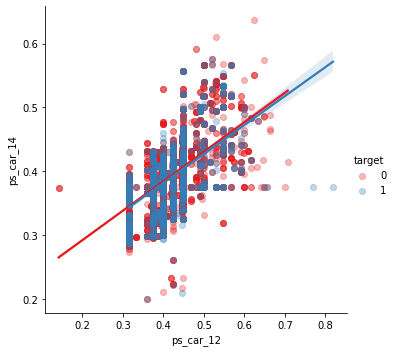

In [148]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

> ps_car_13 and ps_car_15 >> 원본과 상이함

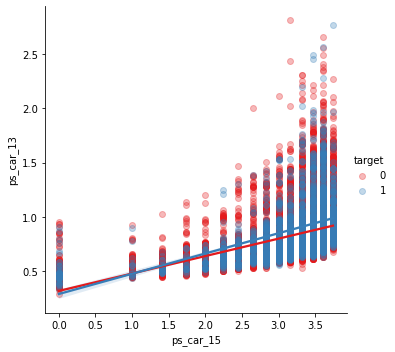

In [149]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

Checking the correlations between ordinal variables

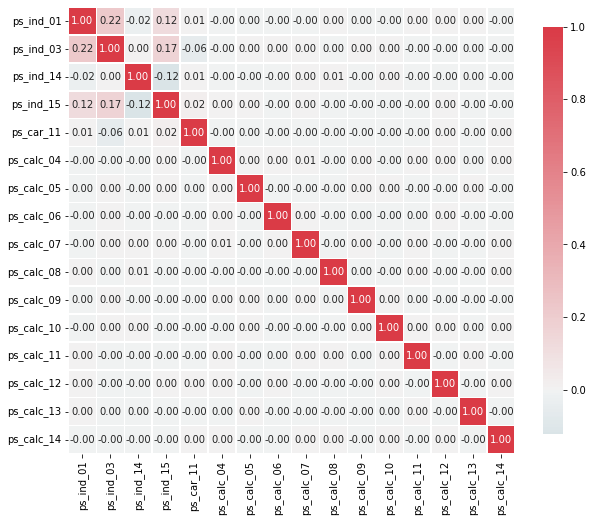

In [150]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

### Feature engineering
 * Deifining the level  
 if 'bin' in f or f == 'target': level = 'binary'  
 elif 'cat' in f or f =='id': level = 'nominal'  
 elif train[f].dtype == float: level = 'interval'  
 elif train[f].dtype == int: level = 'ordinal'  

Creating dummy variables  
> The values of the categorical variables do not represent any order or magnitude. For instance, category 2 is not twice the value of category 1. Therefore we can create dummy variables to deal with that. We drop the first dummy variable as this information can be derived from the other dummy variables generated for the categories of the original variable.

In [151]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


Creating interaction variables
* 다항회귀 PolynomialFeatures()와 fit_transform()    
https://rfriend.tistory.com/274

In [152]:
v = meta[(meta.level == 'interval') & (meta.keep)].index #train[f].dtype == float >> tain[v]는 실수값을 갖는 컬럼들의 모임
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names(v)) #columns=poly.get_feature_names(v) 차원에 맞게 컬럼(벡터)만들어주는건가
interactions.drop(v, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data >> df합치기_concat(axis=1이면 오른쪽 방향으로 붙여짐)
print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 109 variables in train
After creating interactions we have 164 variables in train


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [165]:
interactions.head(2)

,ps_reg_01^2,ps_reg_01 ps_reg_02,ps_reg_01 ps_reg_03,ps_reg_01 ps_car_12,ps_reg_01 ps_car_13,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,0.36,0.36,0.502892,0.221269,0.324362,0.207413,1.2,0.54,0.18,0.00,0.36,0.502892,0.221269,0.324362,0.207413,1.2,0.54,0.18,0.00,0.702500,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.000000,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.000000,0.292252,0.186880,1.081207,0.486543,0.162181,0.000000,0.1195,0.691375,0.311119,0.103706,0.000000,4.0,1.8,0.6,0.0,0.81,0.27,0.00,0.09,0.0,0.00
1,0.81,0.54,0.655596,0.381838,0.344658,0.340933,0.0,0.18,0.00,0.54,0.36,0.437064,0.254558,0.229772,0.227288,0.0,0.12,0.00,0.36,0.530625,0.309051,0.278958,0.275943,0.000000,0.145688,0.000000,0.437064,0.180,0.162473,0.160717,0.000000,0.084853,0.000000,0.254558,0.146653,0.145068,0.000000,0.076591,0.000000,0.229772,0.1435,0.000000,0.075763,0.000000,0.227288,0.0,0.0,0.0,0.0,0.04,0.00,0.12,0.00,0.0,0.36


In [154]:
train.head(1)

,id,target,ps_ind_01,ps_ind_03,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_te,ps_ind_02_cat_1,ps_ind_02_cat_2,ps_ind_02_cat_3,ps_ind_02_cat_4,...,ps_reg_01 ps_car_14,ps_reg_01 ps_car_15,ps_reg_01 ps_calc_01,ps_reg_01 ps_calc_02,ps_reg_01 ps_calc_03,ps_reg_02^2,ps_reg_02 ps_reg_03,ps_reg_02 ps_car_12,ps_reg_02 ps_car_13,ps_reg_02 ps_car_14,ps_reg_02 ps_car_15,ps_reg_02 ps_calc_01,ps_reg_02 ps_calc_02,ps_reg_02 ps_calc_03,ps_reg_03^2,ps_reg_03 ps_car_12,ps_reg_03 ps_car_13,ps_reg_03 ps_car_14,ps_reg_03 ps_car_15,ps_reg_03 ps_calc_01,ps_reg_03 ps_calc_02,ps_reg_03 ps_calc_03,ps_car_12^2,ps_car_12 ps_car_13,ps_car_12 ps_car_14,ps_car_12 ps_car_15,ps_car_12 ps_calc_01,ps_car_12 ps_calc_02,ps_car_12 ps_calc_03,ps_car_13^2,ps_car_13 ps_car_14,ps_car_13 ps_car_15,ps_car_13 ps_calc_01,ps_car_13 ps_calc_02,ps_car_13 ps_calc_03,ps_car_14^2,ps_car_14 ps_car_15,ps_car_14 ps_calc_01,ps_car_14 ps_calc_02,ps_car_14 ps_calc_03,ps_car_15^2,ps_car_15 ps_calc_01,ps_car_15 ps_calc_02,ps_car_15 ps_calc_03,ps_calc_01^2,ps_calc_01 ps_calc_02,ps_calc_01 ps_calc_03,ps_calc_02^2,ps_calc_02 ps_calc_03,ps_calc_03^2
0,353762,0,1,1,1,0,0,0,0,0,0,0,0,11,0,1,0,0.6,0.6,0.838153,1,0.368782,0.540603,0.345688,2.0,0.9,0.3,0.0,3,0,7,3,8,4,8,1,0,4,6,0,1,1,0,0,1,0.093814,1,0,0,0,...,0.207413,1.2,0.54,0.18,0.0,0.36,0.502892,0.221269,0.324362,0.207413,1.2,0.54,0.18,0.0,0.7025,0.309095,0.453108,0.289739,1.676305,0.754337,0.251446,0.0,0.136,0.199365,0.127483,0.737564,0.331904,0.110635,0.0,0.292252,0.18688,1.081207,0.486543,0.162181,0.0,0.1195,0.691375,0.311119,0.103706,0.0,4.0,1.8,0.6,0.0,0.81,0.27,0.0,0.09,0.0,0.0


### Feature selection

 removing features with no or a very low variance with VarianceThreshold  
>By default it removes features with zero variance. This will not be applicable for this competition as we saw there are no zero-variance variables in the previous steps. But if we would remove features with less than 1% variance, we would remove 31 variables.


In [156]:
selector = VarianceThreshold(threshold=.01)
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

28 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


In [166]:
v

Index(['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin',
       'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2',
       'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2',
       'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5',
       'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2',
       'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12',
       'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4',
       'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2',
       'ps_car_12 ps_car_14', 'ps_car_14^2'],
      dtype='object')

In [157]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train) #fit('input','target')
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]])) # % 문자열

 1) ps_car_11_cat_te               0.020985
 2) ps_car_13                      0.017393
 3) ps_car_13^2                    0.017255
 4) ps_car_12 ps_car_13            0.017246
 5) ps_car_13 ps_car_14            0.017134
 6) ps_reg_03 ps_car_13            0.017116
 7) ps_car_13 ps_car_15            0.016815
 8) ps_reg_01 ps_car_13            0.016791
 9) ps_reg_03 ps_car_14            0.016253
10) ps_reg_03 ps_car_12            0.015556
11) ps_reg_03 ps_car_15            0.015193
12) ps_car_14 ps_car_15            0.015043
13) ps_car_13 ps_calc_01           0.014747
14) ps_car_13 ps_calc_02           0.014728
15) ps_reg_02 ps_car_13            0.014669
16) ps_car_13 ps_calc_03           0.014659
17) ps_reg_01 ps_reg_03            0.014649
18) ps_reg_01 ps_car_14            0.014439
19) ps_reg_03^2                    0.014246
20) ps_reg_03                      0.014224
21) ps_reg_03 ps_calc_03           0.013822
22) ps_reg_03 ps_calc_02           0.013807
23) ps_reg_03 ps_calc_01        

> With SelectFromModel we can specify which prefit classifier to use and what the threshold is for the feature importances. With the get_support method we can then limit the number of variables in the train data.

In [158]:
sfm = SelectFromModel(rf, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(X_train.shape[1]))
n_features = sfm.transform(X_train).shape[1]
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 162


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Number of features after selection: 81


In [159]:
# 리스트 연산 활용 selected_vars + ['target']
train = train[selected_vars + ['target']]

### Feature scaling
As mentioned before, we can apply standard scaling to the training data. Some classifiers perform better when this is done.

In [160]:
scaler = StandardScaler()
scaler.fit_transform(train.drop(['target'], axis=1))

array([[-0.45941104, -1.26665356,  1.05087653, ..., -0.72553616,
        -1.01071913, -1.06173767],
       [ 1.55538958,  0.95034274, -0.63847299, ..., -1.06120876,
        -1.01071913,  0.27907892],
       [ 1.05168943, -0.52765479, -0.92003125, ...,  1.95984463,
        -0.56215309, -1.02449277],
       ...,
       [-0.9631112 ,  0.58084336,  0.48776003, ..., -0.46445747,
         0.18545696,  0.27907892],
       [-0.9631112 , -0.89715418, -1.48314775, ..., -0.91202093,
        -0.41263108,  0.27907892],
       [-0.45941104, -1.26665356,  1.61399304, ...,  0.28148164,
        -0.11358706, -0.72653353]])